In [1]:
from citipy import citipy
import pandas as pd
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
from config import weather_api
from pprint import pprint

# Creating the cities DataFrame

In [2]:
#Create a list of random latitudes and longitudes
cities_df = pd.DataFrame({"lat":np.random.uniform(-90,90,500), "long":np.random.uniform(-180,180,500)})

print(len(cities_df))

cities_df.head()

500


,lat,long
0,-82.120560,-34.345550
1,-41.105506,94.113278
2,-36.833358,41.336667
3,28.578831,110.098468
4,10.544752,84.422507


In [3]:
city_name = []
country_list =[]

for coords in range(0, len(cities_df["lat"])):
    lat=cities_df.iloc[coords]["lat"]
    long=cities_df.iloc[coords]["long"]
    city = citipy.nearest_city(lat,long)
    name= city.city_name
    city_name.append(name)
    country= city.country_code
    country_list.append(country)

cities_df["city"]=city_name
cities_df["country"]=country_list

cities_df.head()

,lat,long,city,country
0,-82.120560,-34.345550,ushuaia,ar
1,-41.105506,94.113278,busselton,au
2,-36.833358,41.336667,beloha,mg
3,28.578831,110.098468,jishou,cn
4,10.544752,84.422507,trincomalee,lk


In [4]:
cities_df["city"].duplicated().value_counts()

False    283
True     217
Name: city, dtype: int64

### Since there are duplicated cities in our DF, we  have to drop those specific rows. 

In [5]:
cleancities_df = cities_df.drop_duplicates(subset="city", keep="first").reset_index(drop=True)


In [6]:
len(cleancities_df)

283

### Now that we have a clean data set, we can keep going with the exercise.

In [7]:
cleancities_df["max temp"] = ""
cleancities_df["humidity"] = ""
cleancities_df["cloudiness"] = ""
cleancities_df["wind speed"] = ""
cleancities_df["date"] = ""

cleancities_df.head()

,lat,long,city,country,max temp,humidity,cloudiness,wind speed,date
0,-82.120560,-34.345550,ushuaia,ar,,,,,
1,-41.105506,94.113278,busselton,au,,,,,
2,-36.833358,41.336667,beloha,mg,,,,,
3,28.578831,110.098468,jishou,cn,,,,,
4,10.544752,84.422507,trincomalee,lk,,,,,


In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
api_key = weather_api
query_url = f"{url}appid={api_key}&units={units}&q="

for index, row in cleancities_df.iterrows():
    city = row["city"]
    response = requests.get(query_url + city).json()
    
    print(f"Looking for the weather in city number {index}, {city}")
    
    try:
        cleancities_df.at[index, "lat"] = response["coord"]["lat"]
        cleancities_df.at[index, "long"] = response["coord"]["lon"]
        cleancities_df.at[index, "max temp"] = response["main"]["temp_max"]
        cleancities_df.at[index, "humidity"] = response["main"]["humidity"]
        cleancities_df.at[index, "cloudiness"] = response["clouds"]["all"]
        cleancities_df.at[index, "wind speed"] = response["wind"]["speed"]
        cleancities_df.at[index, "date"] = response["dt"]
    except:
          print("Missing city. Moving on...")
          

cleancities_df.head()

Looking for the weather in city number 0, ushuaia
{'coord': {'lon': -68.3, 'lat': -54.8}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 42.8, 'feels_like': 29.41, 'temp_min': 42.8, 'temp_max': 42.8, 'pressure': 1000, 'humidity': 52}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 360}, 'clouds': {'all': 75}, 'dt': 1599706358, 'sys': {'type': 1, 'id': 8303, 'country': 'AR', 'sunrise': 1599648817, 'sunset': 1599689247}, 'timezone': -10800, 'id': 3833367, 'name': 'Ushuaia', 'cod': 200}
Looking for the weather in city number 1, busselton
{'coord': {'lon': 115.33, 'lat': -33.65}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 56.64, 'feels_like': 52.29, 'temp_min': 55.99, 'temp_max': 57, 'pressure': 1014, 'humidity': 67}, 'visibility': 10000, 'wind': {'speed': 5.99, 'deg': 268, 'gust': 15.01}, 'clouds': {'all': 0}, 'dt': 15997066

Looking for the weather in city number 16, kropachevo
{'coord': {'lon': 57.99, 'lat': 55.01}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 51.46, 'feels_like': 49.1, 'temp_min': 51.46, 'temp_max': 51.46, 'pressure': 1013, 'humidity': 88, 'sea_level': 1013, 'grnd_level': 966}, 'visibility': 10000, 'wind': {'speed': 3.4, 'deg': 145}, 'rain': {'1h': 0.3736}, 'clouds': {'all': 100}, 'dt': 1599706940, 'sys': {'country': 'RU', 'sunrise': 1599701494, 'sunset': 1599748723}, 'timezone': 18000, 'id': 540769, 'name': 'Kropachëvo', 'cod': 200}
Looking for the weather in city number 17, puerto ayora
{'coord': {'lon': -90.35, 'lat': -0.74}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 66, 'feels_like': 69.26, 'temp_min': 66, 'temp_max': 66, 'pressure': 1015, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 3, 'deg': 185, 'gust': 5.01}

Looking for the weather in city number 31, yarada
{'coord': {'lon': 83.27, 'lat': 17.65}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 86, 'feels_like': 95.36, 'temp_min': 86, 'temp_max': 86, 'pressure': 1005, 'humidity': 79}, 'visibility': 5000, 'wind': {'speed': 5.82, 'deg': 260}, 'clouds': {'all': 40}, 'dt': 1599706944, 'sys': {'type': 1, 'id': 9255, 'country': 'IN', 'sunrise': 1599696861, 'sunset': 1599741224}, 'timezone': 19800, 'id': 1252783, 'name': 'Yārāda', 'cod': 200}
Looking for the weather in city number 32, lebu
{'coord': {'lon': -73.65, 'lat': -37.62}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 51.15, 'feels_like': 41.61, 'temp_min': 51.15, 'temp_max': 51.15, 'pressure': 1019, 'humidity': 86, 'sea_level': 1019, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 15.75, 'deg': 19}, 'clouds': {'all': 62}, 'dt': 

Looking for the weather in city number 46, sibolga
{'coord': {'lon': 98.78, 'lat': 1.74}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 81.27, 'feels_like': 88.65, 'temp_min': 81.27, 'temp_max': 81.27, 'pressure': 1010, 'humidity': 72, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 1.68, 'deg': 289}, 'rain': {'1h': 0.26339999999999997}, 'clouds': {'all': 93}, 'dt': 1599706681, 'sys': {'country': 'ID', 'sunrise': 1599693485, 'sunset': 1599737157}, 'timezone': 25200, 'id': 1213855, 'name': 'Sibolga', 'cod': 200}
Looking for the weather in city number 47, xining
{'coord': {'lon': 101.77, 'lat': 36.62}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 61.99, 'feels_like': 60.55, 'temp_min': 61.99, 'temp_max': 61.99, 'pressure': 1013, 'humidity': 53, 'sea_level': 1013, 'grnd_level': 782}, 'visibility': 1

Looking for the weather in city number 62, teya
{'coord': {'lon': 92.63, 'lat': 60.38}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 48.78, 'feels_like': 46.54, 'temp_min': 48.78, 'temp_max': 48.78, 'pressure': 1019, 'humidity': 80, 'sea_level': 1019, 'grnd_level': 995}, 'visibility': 10000, 'wind': {'speed': 1.05, 'deg': 176}, 'rain': {'1h': 0.13}, 'clouds': {'all': 92}, 'dt': 1599706950, 'sys': {'country': 'RU', 'sunrise': 1599692721, 'sunset': 1599740872}, 'timezone': 25200, 'id': 1489656, 'name': 'Teya', 'cod': 200}
Looking for the weather in city number 63, barentsburg
{'cod': '404', 'message': 'city not found'}
Missing city. Moving on...
Looking for the weather in city number 64, bilma
{'coord': {'lon': 12.92, 'lat': 18.69}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 92.21, 'feels_like': 85.3, 'temp_min': 92.21, 'tem

Looking for the weather in city number 78, tuy hoa
{'coord': {'lon': 109.3, 'lat': 13.08}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 89.17, 'feels_like': 97, 'temp_min': 89.17, 'temp_max': 89.17, 'pressure': 1008, 'humidity': 57, 'sea_level': 1008, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 1.41, 'deg': 136}, 'clouds': {'all': 88}, 'dt': 1599706953, 'sys': {'country': 'VN', 'sunrise': 1599690719, 'sunset': 1599734875}, 'timezone': 25200, 'id': 1563281, 'name': 'Tuy Hoa', 'cod': 200}
Looking for the weather in city number 79, kitimat
{'coord': {'lon': -128.65, 'lat': 54.05}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 66, 'feels_like': 68.67, 'temp_min': 66, 'temp_max': 66, 'pressure': 1016, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 1.07, 'deg': 64}, 'clouds': {'all': 0}, 'dt': 1599706953, 's

Looking for the weather in city number 92, sungairaya
{'coord': {'lon': 108.9, 'lat': 0.7}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 77.36, 'feels_like': 82.58, 'temp_min': 77.36, 'temp_max': 77.36, 'pressure': 1008, 'humidity': 86, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 87}, 'clouds': {'all': 100}, 'dt': 1599706956, 'sys': {'country': 'ID', 'sunrise': 1599691079, 'sunset': 1599734707}, 'timezone': 25200, 'id': 1625908, 'name': 'Sungai Raya', 'cod': 200}
Looking for the weather in city number 93, grand river south east
{'cod': '404', 'message': 'city not found'}
Missing city. Moving on...
Looking for the weather in city number 94, hamilton
{'coord': {'lon': -84.53, 'lat': 39.18}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 72.63, 'feels_like': 77.34, 'temp_min': 69.8, 

Looking for the weather in city number 109, torbay
{'coord': {'lon': -52.73, 'lat': 47.67}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 62.98, 'feels_like': 62.89, 'temp_min': 62.01, 'temp_max': 64.99, 'pressure': 1026, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 290}, 'clouds': {'all': 75}, 'dt': 1599706960, 'sys': {'type': 1, 'id': 998, 'country': 'CA', 'sunrise': 1599728531, 'sunset': 1599774818}, 'timezone': -9000, 'id': 6167817, 'name': 'Torbay', 'cod': 200}
Looking for the weather in city number 110, husavik
{'coord': {'lon': -17.34, 'lat': 66.04}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 42.8, 'feels_like': 36.52, 'temp_min': 42.8, 'temp_max': 42.8, 'pressure': 1002, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 160}, 'rain': {'1h': 0.4}, 'clouds': {'all': 90}, 'dt': 

Looking for the weather in city number 124, nara
{'coord': {'lon': 135.8, 'lat': 34.69}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.15, 'feels_like': 88.38, 'temp_min': 81, 'temp_max': 82.99, 'pressure': 1010, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 0}, 'clouds': {'all': 75}, 'dt': 1599706919, 'sys': {'type': 1, 'id': 8040, 'country': 'JP', 'sunrise': 1599683777, 'sunset': 1599729100}, 'timezone': 32400, 'id': 1855612, 'name': 'Nara', 'cod': 200}
Looking for the weather in city number 125, saint-philippe
{'coord': {'lon': 55.77, 'lat': -21.36}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 60.58, 'feels_like': 51.91, 'temp_min': 54, 'temp_max': 69.8, 'pressure': 1021, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 17.22, 'deg': 120}, 'clouds': {'all': 20}, 'dt': 1599706656, 'sys': {'t

Looking for the weather in city number 140, nirgua
{'coord': {'lon': -68.57, 'lat': 10.16}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 66.38, 'feels_like': 70.79, 'temp_min': 66.38, 'temp_max': 66.38, 'pressure': 1014, 'humidity': 98, 'sea_level': 1014, 'grnd_level': 925}, 'visibility': 10000, 'wind': {'speed': 2.17, 'deg': 169}, 'clouds': {'all': 100}, 'dt': 1599706967, 'sys': {'country': 'VE', 'sunrise': 1599647075, 'sunset': 1599691119}, 'timezone': -14400, 'id': 3631507, 'name': 'Nirgua', 'cod': 200}
Looking for the weather in city number 141, mar del plata
{'coord': {'lon': -57.56, 'lat': -38}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 50.92, 'feels_like': 46.8, 'temp_min': 50, 'temp_max': 51.8, 'pressure': 1019, 'humidity': 76}, 'visibility': 8000, 'wind': {'speed': 4.7, 'deg': 230}, 'clouds': {'all': 75}, 'dt

Looking for the weather in city number 156, pevek
{'coord': {'lon': 170.31, 'lat': 69.7}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 41.02, 'feels_like': 35.6, 'temp_min': 41.02, 'temp_max': 41.02, 'pressure': 1022, 'humidity': 95, 'sea_level': 1022, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 5.57, 'deg': 299}, 'clouds': {'all': 100}, 'dt': 1599706688, 'sys': {'country': 'RU', 'sunrise': 1599672716, 'sunset': 1599723600}, 'timezone': 43200, 'id': 2122090, 'name': 'Pevek', 'cod': 200}
Looking for the weather in city number 157, tiznit
{'coord': {'lon': -9.5, 'lat': 29.58}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 73.11, 'feels_like': 71.06, 'temp_min': 73.11, 'temp_max': 73.11, 'pressure': 1014, 'humidity': 41, 'sea_level': 1014, 'grnd_level': 951}, 'visibility': 10000, 'wind': {'speed': 2.86, 'deg': 303

Looking for the weather in city number 173, tucupita
{'coord': {'lon': -62.05, 'lat': 9.06}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 74.52, 'feels_like': 83.07, 'temp_min': 74.52, 'temp_max': 74.52, 'pressure': 1014, 'humidity': 96, 'sea_level': 1014, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 1.48, 'deg': 142}, 'clouds': {'all': 100}, 'dt': 1599706973, 'sys': {'country': 'VE', 'sunrise': 1599645535, 'sunset': 1599689530}, 'timezone': -14400, 'id': 3625929, 'name': 'Tucupita', 'cod': 200}
Looking for the weather in city number 174, naryan-mar
{'coord': {'lon': 53.09, 'lat': 67.67}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 54.73, 'feels_like': 47.19, 'temp_min': 54.73, 'temp_max': 54.73, 'pressure': 995, 'humidity': 88, 'sea_level': 995, 'grnd_level': 994}, 'visibility': 10000, 'wind': {'speed'

Looking for the weather in city number 188, saint george
{'coord': {'lon': -113.58, 'lat': 37.1}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 70.07, 'feels_like': 53.83, 'temp_min': 68, 'temp_max': 71.6, 'pressure': 1016, 'humidity': 18}, 'visibility': 10000, 'wind': {'speed': 20.8, 'deg': 40, 'gust': 27.51}, 'clouds': {'all': 1}, 'dt': 1599706847, 'sys': {'type': 1, 'id': 5832, 'country': 'US', 'sunrise': 1599657130, 'sunset': 1599702663}, 'timezone': -21600, 'id': 5546220, 'name': 'Saint George', 'cod': 200}
Looking for the weather in city number 189, gwembe
{'coord': {'lon': 27.61, 'lat': -16.5}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 51.58, 'feels_like': 47.59, 'temp_min': 51.58, 'temp_max': 51.58, 'pressure': 1019, 'humidity': 57, 'sea_level': 1019, 'grnd_level': 879}, 'visibility': 10000, 'wind': {'speed': 2.13, 'deg': 

Looking for the weather in city number 204, ambovombe
{'coord': {'lon': 46.08, 'lat': -25.17}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 66.88, 'feels_like': 67.95, 'temp_min': 66.88, 'temp_max': 66.88, 'pressure': 1021, 'humidity': 87, 'sea_level': 1021, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 5.93, 'deg': 64}, 'clouds': {'all': 0}, 'dt': 1599706979, 'sys': {'country': 'MG', 'sunrise': 1599706689, 'sunset': 1599749243}, 'timezone': 10800, 'id': 1079048, 'name': 'Ambovombe', 'cod': 200}
Looking for the weather in city number 205, mitsamiouli
{'coord': {'lon': 43.28, 'lat': -11.38}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 76.5, 'feels_like': 80.11, 'temp_min': 76.5, 'temp_max': 76.5, 'pressure': 1015, 'humidity': 75, 'sea_level': 1015, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 5.37, 'deg'

Looking for the weather in city number 221, russell
{'coord': {'lon': -85.2, 'lat': 32.35}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77.49, 'feels_like': 82.09, 'temp_min': 73.99, 'temp_max': 80.6, 'pressure': 1019, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 4.07, 'deg': 38}, 'clouds': {'all': 75}, 'dt': 1599706982, 'sys': {'type': 1, 'id': 4765, 'country': 'US', 'sunrise': 1599650479, 'sunset': 1599695695}, 'timezone': -18000, 'id': 4047434, 'name': 'Russell', 'cod': 200}
Looking for the weather in city number 222, ancud
{'coord': {'lon': -73.82, 'lat': -41.87}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 42.66, 'feels_like': 25.59, 'temp_min': 39.99, 'temp_max': 46, 'pressure': 1015, 'humidity': 97}, 'visibility': 9731, 'wind': {'speed': 27, 'deg': 0, 'gust': 57}, 'rain': {'1h': 1.48}, 'clouds': {'all': 1

Looking for the weather in city number 236, nouadhibou
{'coord': {'lon': -17.03, 'lat': 20.93}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 78.8, 'feels_like': 84.22, 'temp_min': 78.8, 'temp_max': 78.8, 'pressure': 1011, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 290}, 'clouds': {'all': 0}, 'dt': 1599706986, 'sys': {'type': 1, 'id': 2444, 'country': 'MR', 'sunrise': 1599720858, 'sunset': 1599765360}, 'timezone': 0, 'id': 2377457, 'name': 'Nouadhibou', 'cod': 200}
Looking for the weather in city number 237, srednekolymsk
{'coord': {'lon': 153.68, 'lat': 67.45}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 54.95, 'feels_like': 48.79, 'temp_min': 54.95, 'temp_max': 54.95, 'pressure': 1026, 'humidity': 53, 'sea_level': 1026, 'grnd_level': 1024}, 'visibility': 10000, 'wind': {'speed': 6.38, 'deg': 262}, 'c

Looking for the weather in city number 252, mahebourg
{'coord': {'lon': 57.7, 'lat': -20.41}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 69.8, 'feels_like': 65.86, 'temp_min': 69.8, 'temp_max': 69.8, 'pressure': 1021, 'humidity': 88}, 'visibility': 8000, 'wind': {'speed': 17.22, 'deg': 140}, 'clouds': {'all': 75}, 'dt': 1599706655, 'sys': {'type': 1, 'id': 2061, 'country': 'MU', 'sunrise': 1599703796, 'sunset': 1599746559}, 'timezone': 14400, 'id': 934322, 'name': 'Mahébourg', 'cod': 200}
Looking for the weather in city number 253, borba
{'coord': {'lon': -59.59, 'lat': -4.39}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 84.07, 'feels_like': 87.26, 'temp_min': 84.07, 'temp_max': 84.07, 'pressure': 1011, 'humidity': 46, 'sea_level': 1011, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 0.85, 'd

Looking for the weather in city number 266, kandrian
{'coord': {'lon': 149.55, 'lat': -6.22}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 80.74, 'feels_like': 82.29, 'temp_min': 80.74, 'temp_max': 80.74, 'pressure': 1007, 'humidity': 78, 'sea_level': 1007, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 13.85, 'deg': 135}, 'rain': {'1h': 0.26}, 'clouds': {'all': 97}, 'dt': 1599706992, 'sys': {'country': 'PG', 'sunrise': 1599681467, 'sunset': 1599724811}, 'timezone': 36000, 'id': 2094746, 'name': 'Kandrian', 'cod': 200}
Looking for the weather in city number 267, suez
{'coord': {'lon': 32.53, 'lat': 29.97}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 73.56, 'feels_like': 75.09, 'temp_min': 73.56, 'temp_max': 73.56, 'pressure': 1005, 'humidity': 84, 'sea_level': 1005, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'s

Looking for the weather in city number 281, biak
{'coord': {'lon': 122.88, 'lat': -0.91}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 82.15, 'feels_like': 86.52, 'temp_min': 82.15, 'temp_max': 82.15, 'pressure': 1008, 'humidity': 73, 'sea_level': 1008, 'grnd_level': 994}, 'visibility': 10000, 'wind': {'speed': 8.23, 'deg': 217}, 'clouds': {'all': 28}, 'dt': 1599706995, 'sys': {'country': 'ID', 'sunrise': 1599687757, 'sunset': 1599731320}, 'timezone': 28800, 'id': 1637001, 'name': 'Biak', 'cod': 200}
Looking for the weather in city number 282, ararat
{'coord': {'lon': 44.7, 'lat': 39.83}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 64.4, 'feels_like': 60.66, 'temp_min': 64.4, 'temp_max': 64.4, 'pressure': 1018, 'humidity': 55}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 80}, 'clouds': {'all': 0}, 'dt': 1599706996, 

,lat,long,city,country,max temp,humidity,cloudiness,wind speed,date
0,-54.80,-68.30,ushuaia,ar,42.8,52,75,16.11,1599706358
1,-33.65,115.33,busselton,au,57,67,0,5.99,1599706647
2,-25.17,45.05,beloha,mg,70.97,64,48,10.02,1599706937
3,28.32,109.72,jishou,cn,80.22,79,79,1.92,1599706938
4,8.57,81.23,trincomalee,lk,83.71,71,91,18.12,1599706858


In [9]:
print(len(cleancities_df["city"]))

283


In [10]:
cleancities_df

,lat,long,city,country,max temp,humidity,cloudiness,wind speed,date
0,-54.800000,-68.30000,ushuaia,ar,42.8,52,75,16.11,1599706358
1,-33.650000,115.33000,busselton,au,57,67,0,5.99,1599706647
2,-25.170000,45.05000,beloha,mg,70.97,64,48,10.02,1599706937
3,28.320000,109.72000,jishou,cn,80.22,79,79,1.92,1599706938
4,8.570000,81.23000,trincomalee,lk,83.71,71,91,18.12,1599706858
...,...,...,...,...,...,...,...,...,...
278,40.430000,71.72000,komsomolskiy,ru,69.8,35,0,2.24,1599706693
279,1.538881,-170.53697,saleaula,ws,,,,,
280,61.990000,-49.67000,paamiut,gl,39.99,78,88,22.97,1599706995
281,-0.910000,122.88000,biak,id,82.15,73,28,8.23,1599706995


In [11]:
cleancities_df.isnull().sum()

lat           0
long          0
city          0
country       0
max temp      0
humidity      0
cloudiness    0
wind speed    0
date          0
dtype: int64

In [12]:
cleancities_df.dropna(inplace=True)

cleancities_df.isnull().sum()


lat           0
long          0
city          0
country       0
max temp      0
humidity      0
cloudiness    0
wind speed    0
date          0
dtype: int64

In [13]:
print(len(cleancities_df["city"]))

283


In [14]:
cleancities_df.dtypes

lat           float64
long          float64
city           object
country        object
max temp       object
humidity       object
cloudiness     object
wind speed     object
date           object
dtype: object

In [15]:
cleancities_df["max temp"] = pd.to_numeric(cleancities_df["max temp"])
cleancities_df["humidity"] = pd.to_numeric(cleancities_df["humidity"])
cleancities_df["cloudiness"] = pd.to_numeric(cleancities_df["cloudiness"])
cleancities_df["wind speed"] = pd.to_numeric(cleancities_df["wind speed"])

cleancities_df.dtypes

lat           float64
long          float64
city           object
country        object
max temp      float64
humidity      float64
cloudiness    float64
wind speed    float64
date           object
dtype: object

In [16]:
cleancities_df.to_csv(r"..\\Output\\Clean Cities.csv", index = False, header=True)

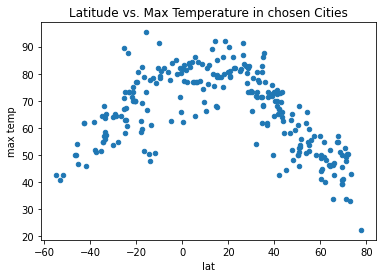

In [17]:
a = cleancities_df.plot.scatter(x="lat", y="max temp").get_figure()
plt.title("Latitude vs. Max Temperature in chosen Cities")
a.savefig("..\\Output\\latvsmaxtemp.png")
plt.show()

### This scatter plot makes the most sense to me. We can notice how temperature increases the closer we move to the Equator.

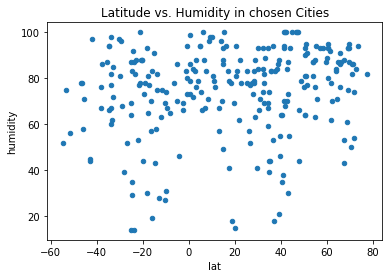

In [18]:
b= cleancities_df.plot.scatter(x="lat", y="humidity").get_figure()
plt.title("Latitude vs. Humidity in chosen Cities")
b.savefig("..\\Output\\latvshumid.png")
plt.show()

### Humidity and Latitude seems a little random. I'd believe that a city would be more humid if it was closer to the ocean. Or maybe it depends on the amount of vegetation there is there.

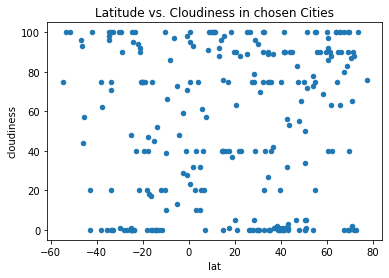

In [19]:
c=cleancities_df.plot.scatter(x="lat", y="cloudiness").get_figure()
plt.title("Latitude vs. Cloudiness in chosen Cities")
c.savefig("..\\Output\\latvscloud.png")
plt.show()

### There doesn't appear to be anything noticeable in this scatter plot.

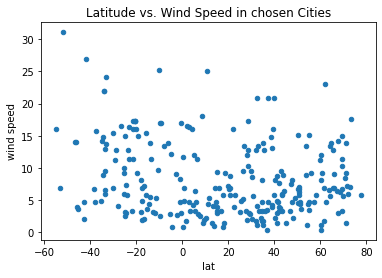

In [20]:
d=cleancities_df.plot.scatter(x="lat", y="wind speed").get_figure()
plt.title("Latitude vs. Wind Speed in chosen Cities")
d.savefig("..\\Output\\latvswind.png")
plt.show()

### We can see that the cities that were chosen are not that windy. Maybe if we plotted altitude along with latitude and wind speed, we could see another kind of pattern.

# Now lets makes regressions comparing the Northern and Southern Hemisphere

In [21]:
import scipy.stats as st
from scipy.stats import linregress

In [22]:
northhem = cleancities_df.loc[cleancities_df["lat"]>=0]
southhem = cleancities_df.loc[cleancities_df["lat"]<0]

northhem.dropna(inplace=True)
southhem.dropna(inplace=True)

<ipython-input-22-4312184d1897>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  northhem.dropna(inplace=True)
<ipython-input-22-4312184d1897>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  southhem.dropna(inplace=True)


In [23]:
def regression(x_values, y_values, x_label, y_label, eq_pos, save):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(eq_pos),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{save}")
    print(f"The r-squared is: {rvalue**2}")
    plt.savefig(f"..\\Output\\{save}")
    plt.show()

The r-squared is: 0.6964837688269448


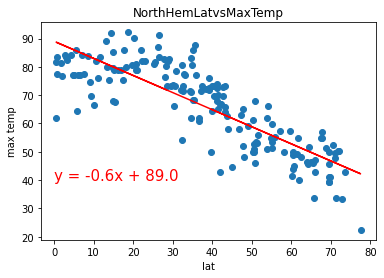

In [24]:
x_label = "lat"
y_label = "max temp"

eq_pos = (0,40)

regression(northhem[x_label], northhem[y_label], x_label, y_label, eq_pos, "NorthHemLatvsMaxTemp")

The r-squared is: 0.47250366929904647


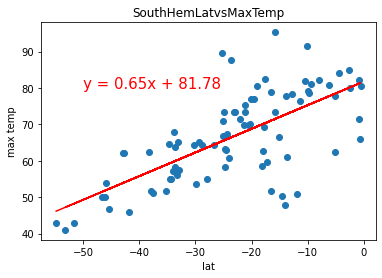

In [32]:
x_label = "lat"
y_label = "max temp"

eq_pos = (-50,80)

regression(southhem[x_label], southhem[y_label], x_label, y_label, eq_pos, "SouthHemLatvsMaxTemp")

The r-squared is: 0.0018397880258591282


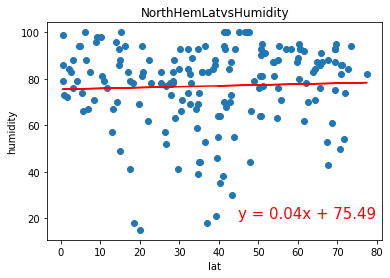

In [33]:
x_label = "lat"
y_label = "humidity"

eq_pos = (45,20)

regression(northhem[x_label], northhem[y_label], x_label, y_label, eq_pos, "NorthHemLatvsHumidity")

The r-squared is: 0.0022688771565869442


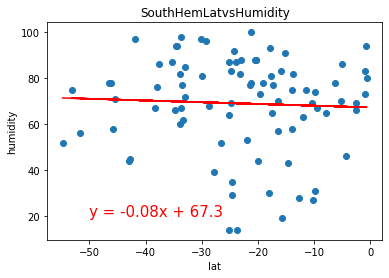

In [34]:
x_label = "lat"
y_label = "humidity"

eq_pos = (-50,20)

regression(southhem[x_label], southhem[y_label], x_label, y_label, eq_pos, "SouthHemLatvsHumidity")

The r-squared is: 0.005373095145048143


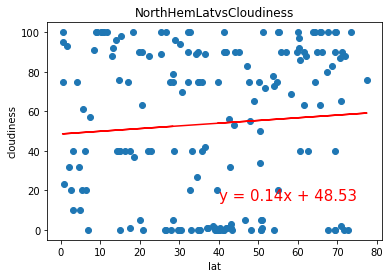

In [35]:
x_label = "lat"
y_label = "cloudiness"

eq_pos = (40,15)

regression(northhem[x_label], northhem[y_label], x_label, y_label, eq_pos, "NorthHemLatvsCloudiness")

The r-squared is: 0.03172820507682186


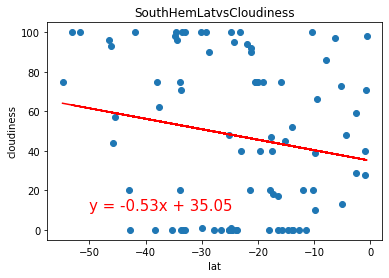

In [36]:
x_label = "lat"
y_label = "cloudiness"

eq_pos = (-50,10)

regression(southhem[x_label], southhem[y_label], x_label, y_label, eq_pos, "SouthHemLatvsCloudiness")

The r-squared is: 0.007861228651418386


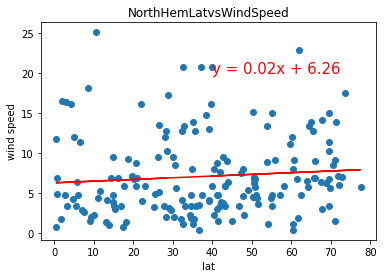

In [37]:
x_label = "lat"
y_label = "wind speed"

eq_pos = (40,20)

regression(northhem[x_label], northhem[y_label], x_label, y_label, eq_pos, "NorthHemLatvsWindSpeed")

The r-squared is: 0.04756271658342103


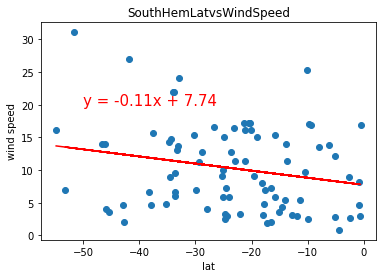

In [38]:
x_label = "lat"
y_label = "wind speed"

eq_pos = (-50,20)

regression(southhem[x_label], southhem[y_label], x_label, y_label, eq_pos, "SouthHemLatvsWindSpeed")

# Observations:

## 1. Temperature is affected by how close you are to the Equator.

## 2. Wind Speed tends to increase the farther away your are from the Equator.

## 3. Cloudiness tends to increase the farther away you are from the Equator.